In [1]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.time import Time

In [2]:
qubic_position = EarthLocation(lat=-24.70*u.deg, lon=-66.68*u.deg, height=5000*u.m)
patch_center = SkyCoord(ra=0*u.deg, dec=-57*u.deg, frame='icrs')

In [3]:
### Observation periodd
debut = Time('2022-01-01 00:00:00')
fin = Time('2022-01-02 00:00:00')
delta_t = 5*u.second  
temps_total = fin - debut
nb_steps = int(temps_total.sec / delta_t.to(u.second).value)
temps = debut + np.arange(nb_steps)*delta_t

In [4]:
### Coordinates change
altaz_frame = AltAz(obstime=temps, location=qubic_position)
patch_altaz = patch_center.transform_to(altaz_frame)

Text(0, 0.5, 'Elevation(degrees)')

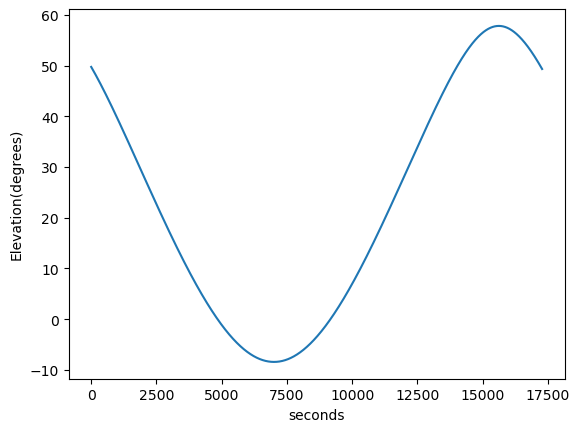

In [5]:
plt.plot(patch_altaz.alt)
plt.xlabel('seconds')
plt.ylabel('Elevation(degrees)')

In [6]:
### The patch is only visible if its altitude is above 40 degrees and below 80 degrees
visible = (patch_altaz.alt > 30*u.deg) & (patch_altaz.alt < 85*u.deg)

In [7]:
### Compute visibility time
temps_visible = np.where(visible)[0].size * delta_t

print("Visible time", temps_visible)
print("Fraction of time visible: ", float(temps_visible/temps_total))

Visible time 34895.0 s
Fraction of time visible:  0.4038773148148148
